<small><i>Based on a notebook put together by Jake Vanderplas.</i></small>

# Principal Component Analysis - Dimensionality Reduction

### Example: height, weight, income for the female population in the US; 
### Show Gaussian distribution for one variable first.

## Machine Learning Techniques:

- ### PCA
- ### SVM

## You will NOT be writing the code at the heart of these algorithms.  (You can -- but it will take a lot of time, and it will take a lot of testing to make your code fast and robust).

## So the approach here is 

- ### I will help you understand the concepts and math behind the code so that you

    ### (i) understand why it works
    ### (ii) can code it up yourself if needed
   
- ### The most general/common strategies and tactics in ML as demonstrated in these two techniques, so that when you do write your own ML code one day, you can apply these test-and-true principles/strategies/tactics. 

In [1]:
%matplotlib inline
''' Initial Imports'''


import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


#********************* THE MAIN IMPORT OF THIS LECTURE********************************
from sklearn.decomposition import PCA

## Variance and Standard Deviation

## Strictly speaking, these quantities only refer to the Gaussian distribution.

## The variance:

$$
Var = \langle (x_i - \bar{x})^2 \rangle = \frac {\sum_{i}{(x_i - \bar{x})^2}}{N}
$$

## and the standard deviation, $\sigma$:

$$
\sigma = \sqrt{Var}
$$
 

## Breakout: 

- ### Plot the histograms of two Gaussian random variables, one with a standard deviatoin of 1 and the other 5, with the average of either being 2.
- ### Compute the $\sigma$ and the variance var (or $\sigma^2$) by using the numpy functions np.std and np.var

## If the variance around the average is too small, then sometimes one can safely replace a random variable with its average (or zero variance).

## Introducing Principal Component Analysis

Principal Component Analysis is a very powerful unsupervised method for *dimensionality reduction* in data.  It's easiest to visualize by looking at a two-dimensional dataset:

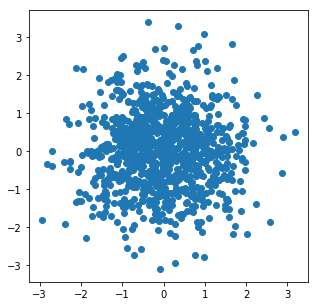

In [2]:
'''2 sets of uncorrelated random numbers'''

x1 = np.random.randn(1000)
x2 = np.random.randn(1000)
plt.figure(figsize = (5, 5))
plt.plot(x1, x2, 'o')
plt.show()

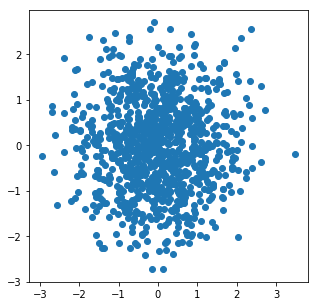

In [3]:
'''Alternative way to generate 2 sets of uncorrelated random numbers'''
X = np.random.randn(2, 1000).T
plt.figure(figsize = (5, 5))
plt.plot(X[:, 0], X[:, 1], 'o')
plt.show()

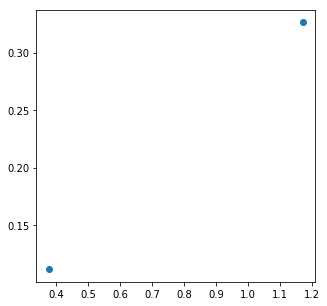

In [4]:
'''
Correlated random numbers

Why would the matrix multiplication generate correlated random numbers?

Just "do the math", and you will see!


'''
X = np.dot(np.random.rand(2, 2), np.random.rand(2, 2))
x1 = X[:, 0]
x2 = X[:, 1]
plt.figure(figsize = (5, 5))
plt.plot(x1, x2, 'o')
plt.show()

(200, 2)


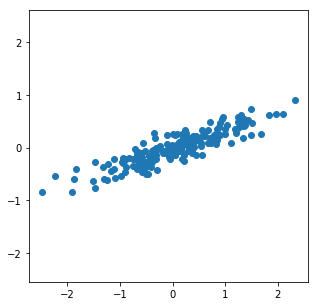

In [5]:
'''

Generate correlated random numbers (say temperature and ice-cream sales)

Turns out if you use r1 = np.random.randn(2, 2) you get a weak anti-correlation


'''

np.random.seed(1)
# make a 2x200 matrix where for each column, the randomness is also 
# spread out in the y-direction.

r1 = np.random.rand(2, 2)
r2 = np.random.randn(2, 200)

X = np.dot(r1, r2).T

x1 = X[:, 0]
x2 = X[:, 1]

print(X.shape)
plt.figure(figsize = (5, 5))
plt.plot(x1, x2, 'o')
# 'equal' forces the units of x and y to be the same,
# it's equivalent to plt.axis(-lim, lim, -lim, lim)
plt.axis('equal')
plt.show()

# End of Week 12-3